#                                      Mid project Bootcamp

## Exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as st
import numpy as np

In [2]:
main = pd.read_csv('HR Employee Attrition.csv')

In [3]:
# Rename Human Resources department for having one more usuful department to explore. 
main['Department'] = main['Department'].replace({'Human Resources':'IT'})
main['JobRole'] = main ['JobRole'].replace({'Human Resources': 'Maintenance & systems', 'Manager':'Data'})
main

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
main.shape

(1470, 35)

In [5]:
# Showing the % nulls values by each column. 

round(main.isna().sum()/len(main),4)*100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

There is not null values.

In [6]:
# Checking the duplicates. 

duplicates = main[main.duplicated()]
duplicate_count = len(duplicates)

print(f"Number of duplicates: {duplicate_count}")
print("Duplicate Rows:")
print(duplicates)

Number of duplicates: 0
Duplicate Rows:
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


In [7]:
#Cheking all the values we have are int64 or object.

main.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
numerical_heads = main.select_dtypes(include=['number']).columns.tolist()
print(numerical_heads)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## CLEANING

In [9]:
#Dropping from main and why. 
#Drop. Over 18, EmployeeCount, Standardhour, and PerformanceRating.  
# It seems EmployeeCount and Standardhour column has just one type of value. This column does not provide us info.
# PerformanceRating has just two value. I am not sure this variable collect thr right info. 
# Stock option level. (Acciones de la empresa)
# Eliminating all employees under 18.
# Dropping the columns. 
# I don't finally drop employee count because I need it for Tableau. 
# EmployeeCount is a constant

In [10]:
main = main.drop(['Over18', 'StandardHours', 'PerformanceRating', 'EmployeeCount'], axis=1)

In [11]:
main = main.drop(main[main['Age'] == 16].index)

In [12]:
display_16 = main[main['Age'] == 16]
print(display_16)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 31 columns]


In [13]:
min_age = main['Age'].min()
print("Minimum Age:", min_age)

Minimum Age: 18


In [14]:
main.shape

(1470, 31)

In [15]:
main.to_excel('Mid_bootcamp_project.xlsx', index=False)

In [16]:
main.to_csv('Mid bootcamp proyect.csv', index=False)

In [17]:
numerical_main = main.select_dtypes(np.number)

In [18]:
def check_numerical_variables(numerical_main):
    for col in numerical_main.columns:
        unique_values = numerical_main[col].unique()
        num_unique_values = len(unique_values)
        data_type = numerical_main[col].dtype

        print(f"Column: {col}")
        print(f"Data Type: {data_type}")
        print(f"Unique Values: {unique_values}")
        print(f"Number of Unique Values: {num_unique_values}")
        print("----------------------")

check_numerical_variables(numerical_main)


Column: Age
Data Type: int64
Unique Values: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Number of Unique Values: 43
----------------------
Column: DailyRate
Data Type: int64
Unique Values: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  8

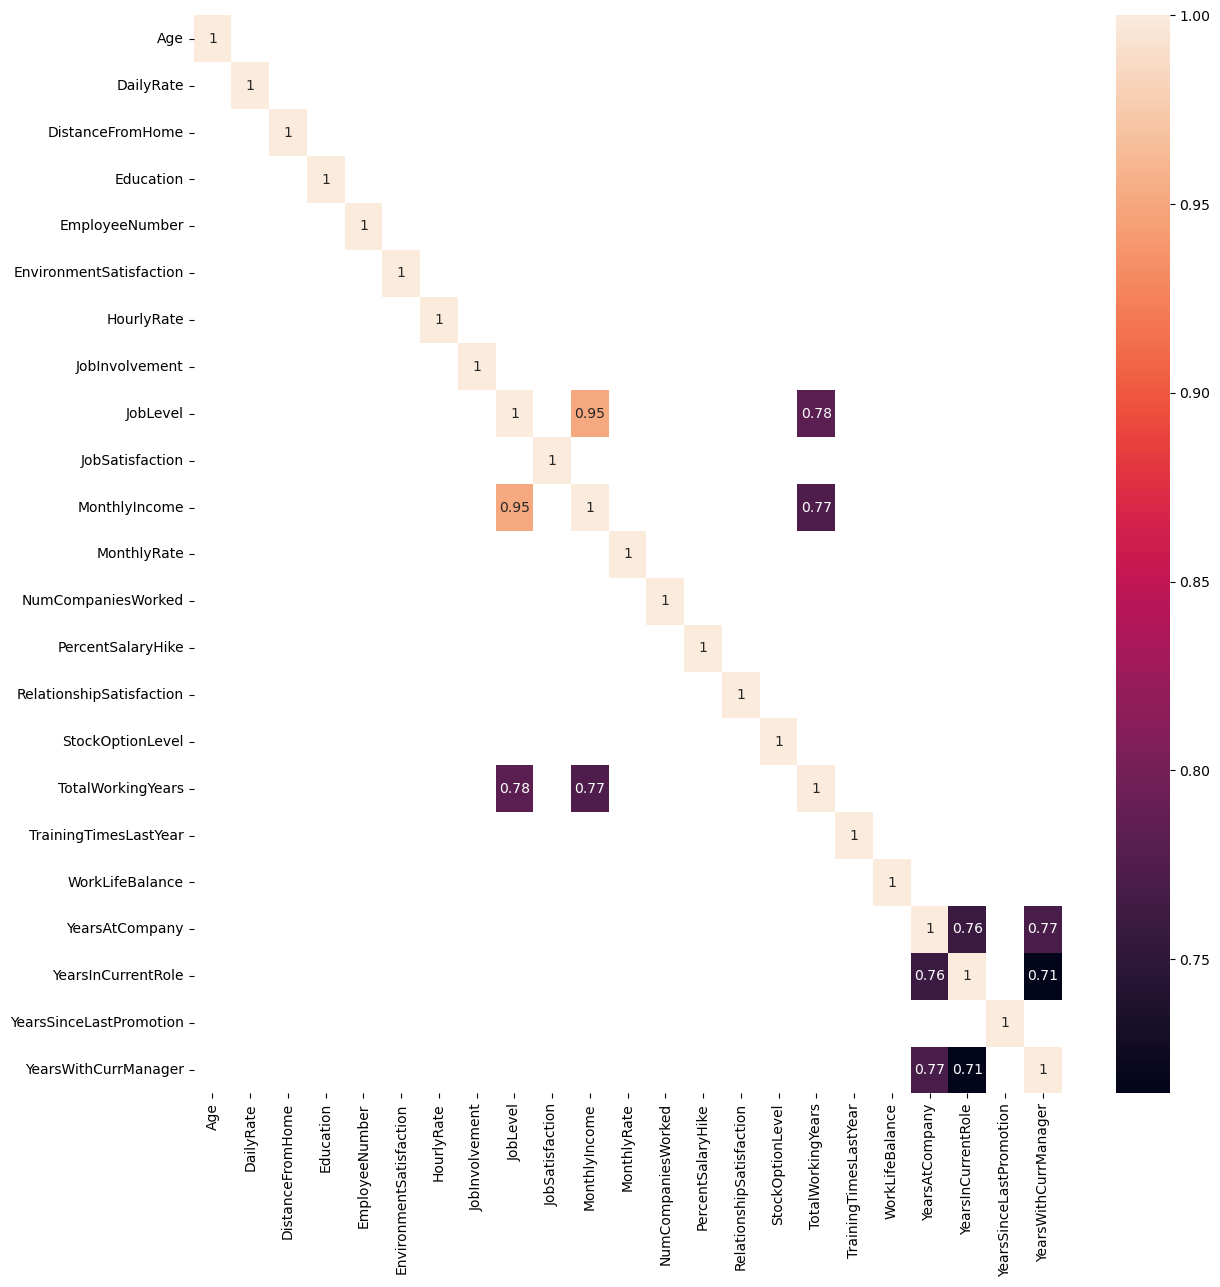

In [19]:
# Filtering correlations to check the multycolinearity. 
correlations_matrix = numerical_main.corr()

# Filter correlations greater than 0.7. Otherwise the heat map will be so difficult to read 
filtered_corr_matrix = correlations_matrix[correlations_matrix.abs() > 0.7]

# Set the size of the heatmap
plt.figure(figsize=(14, 14))

# Plot the filtered heatmap with annotations
sns.heatmap(filtered_corr_matrix, annot=True)

# Display
plt.show()

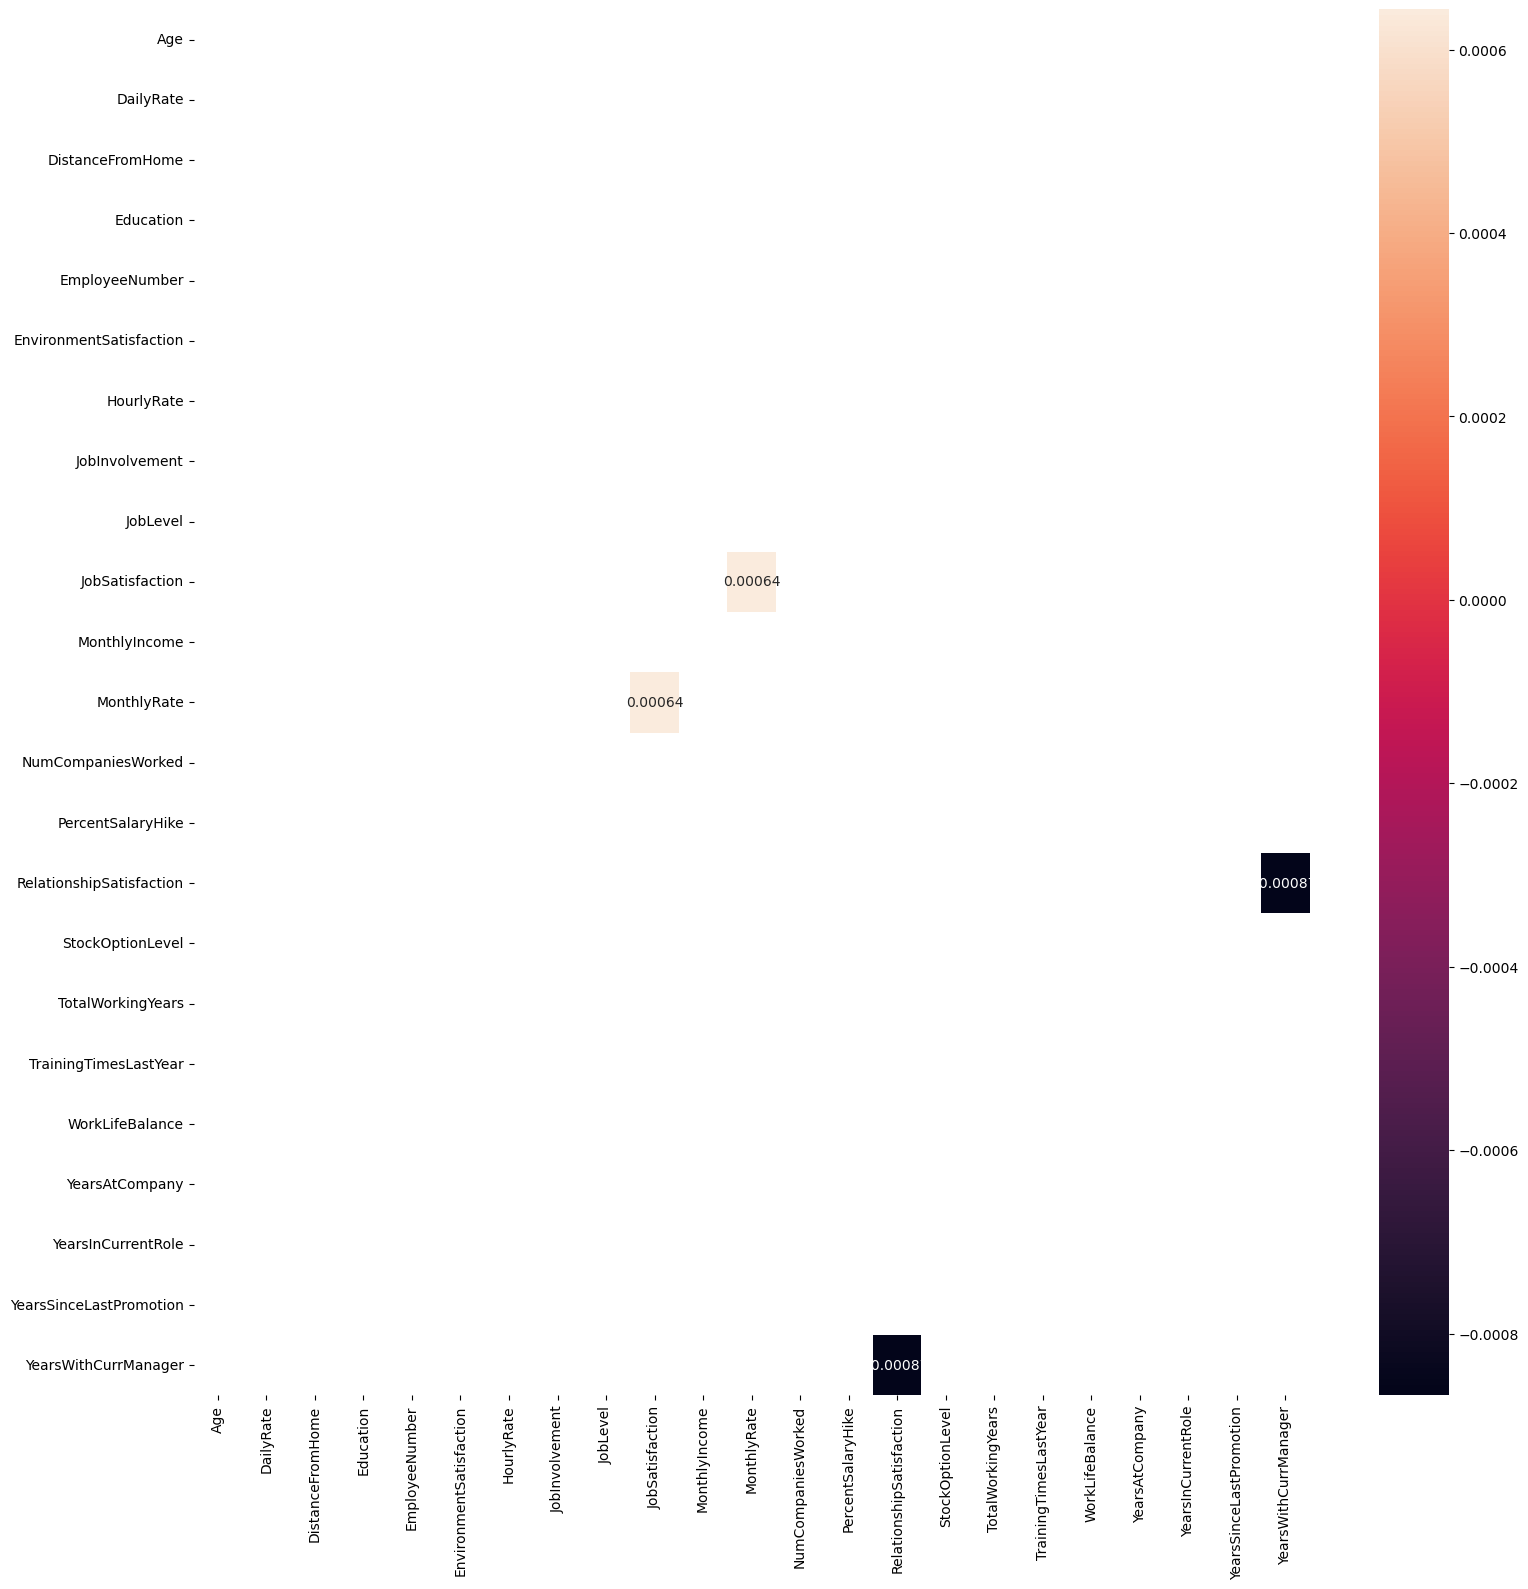

In [20]:
# Filtering correlations to check the multicollinearity
correlations_matrix = numerical_main.corr()

# Filter correlations lower than -0.7
filtered_corr_matrix = correlations_matrix[correlations_matrix.abs() < 0.001]

# Set the size of the heatmap
plt.figure(figsize=(18, 18))

# Plot the filtered heatmap with annotations
sns.heatmap(filtered_corr_matrix, annot=True)

# Display the heatmap
plt.show()

In [21]:
categorical_main = main.select_dtypes('object')
categorical_main

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [22]:
def check_categorical_variables(categorical_main):
    for col in categorical_main.columns:
        unique_values = categorical_main[col].unique()
        num_unique_values = len(unique_values)
        data_type = categorical_main[col].dtype

        print(f"Column: {col}")
        print(f"Data Type: {data_type}")
        print(f"Unique Values: {unique_values}")
        print(f"Number of Unique Values: {num_unique_values}")
        print("----------------------")

# Assuming you have a DataFrame named 'numerical_main' containing your data
check_categorical_variables(categorical_main)

Column: Attrition
Data Type: object
Unique Values: ['Yes' 'No']
Number of Unique Values: 2
----------------------
Column: BusinessTravel
Data Type: object
Unique Values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Number of Unique Values: 3
----------------------
Column: Department
Data Type: object
Unique Values: ['Sales' 'Research & Development' 'IT']
Number of Unique Values: 3
----------------------
Column: EducationField
Data Type: object
Unique Values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Number of Unique Values: 6
----------------------
Column: Gender
Data Type: object
Unique Values: ['Female' 'Male']
Number of Unique Values: 2
----------------------
Column: JobRole
Data Type: object
Unique Values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Data'
 'Sales Representative' 'Research Director' 'Maintenance & systems']
Number of Unique Values: 9
---------

In [23]:
#Checking all roles are organized by Department properly. 
pd.set_option('display.max_colwidth', None)

jobrole_by_department = categorical_main.groupby('Department')['JobRole'].unique().reset_index()
print(jobrole_by_department)

               Department  \
0                      IT   
1  Research & Development   
2                   Sales   

                                                                                                                   JobRole  
0                                                                                            [Maintenance & systems, Data]  
1  [Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Research Director, Data]  
2                                                                            [Sales Executive, Data, Sales Representative]  


In [24]:
pd.set_option('display.max_colwidth', None)

jobrole_by_department = categorical_main.groupby('BusinessTravel')['JobRole'].unique().reset_index()
print(jobrole_by_department)

      BusinessTravel  \
0         Non-Travel   
1  Travel_Frequently   
2      Travel_Rarely   

                                                                                                                                                                                 JobRole  
0  [Laboratory Technician, Manufacturing Director, Sales Executive, Healthcare Representative, Research Scientist, Data, Research Director, Sales Representative, Maintenance & systems]  
1  [Research Scientist, Laboratory Technician, Manufacturing Director, Sales Executive, Research Director, Healthcare Representative, Data, Sales Representative, Maintenance & systems]  
2  [Sales Executive, Laboratory Technician, Healthcare Representative, Research Scientist, Manufacturing Director, Data, Sales Representative, Research Director, Maintenance & systems]  


## PROCESSING

Seleccionar las categoricas y ponerlas en matriz de correlaciones. 
Poner las categóricas en numéricas para ver la correlación que tienen con las numéricas originales. 

In [25]:
#Selecting all the columns I need to encode manually. 
# Attrition and Overtime because I need to ensure in both cases Yes=1 and NO=0
# About BusinessTravel because its values has an order to follow.

categorical_main_manually_encoded = categorical_main[["Attrition", "OverTime","BusinessTravel"]]
categorical_main_manually_encoded

,Attrition,OverTime,BusinessTravel
0,Yes,Yes,Travel_Rarely
1,No,No,Travel_Frequently
2,Yes,Yes,Travel_Rarely
3,No,Yes,Travel_Frequently
4,No,No,Travel_Rarely
...,...,...,...
1465,No,No,Travel_Frequently
1466,No,No,Travel_Rarely
1467,No,Yes,Travel_Rarely
1468,No,No,Travel_Frequently


In [26]:
categorical_main_manually_encoded["Attrition"] = categorical_main["Attrition"].map({"Yes": 1, "No": 0})
categorical_main_manually_encoded["OverTime"] = categorical_main["OverTime"].map({"Yes": 1, "No": 0})
categorical_main_manually_encoded["BusinessTravel"] = categorical_main["BusinessTravel"].map({'Non-Travel':0,'Travel_Rarely':0.5,'Travel_Frequently': 1})
categorical_main_manually_encoded
#How can I display a more beautiful

C:\Users\IUREK\AppData\Local\Temp\ipykernel_160908\8448662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_main_manually_encoded["Attrition"] = categorical_main["Attrition"].map({"Yes": 1, "No": 0})
C:\Users\IUREK\AppData\Local\Temp\ipykernel_160908\8448662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_main_manually_encoded["OverTime"] = categorical_main["OverTime"].map({"Yes": 1, "No": 0})
C:\Users\IUREK\AppData\Local\Temp\ipykernel_160908\8448662.py:3: SettingWithCopyWarn

,Attrition,OverTime,BusinessTravel
0,1,1,0.5
1,0,0,1.0
2,1,1,0.5
3,0,1,1.0
4,0,0,0.5
...,...,...,...
1465,0,0,1.0
1466,0,0,0.5
1467,0,1,0.5
1468,0,0,1.0


In [27]:
categorical_main_onehot = categorical_main[["Department", "EducationField", "Gender", "JobRole", "MaritalStatus"]]
categorical_main_onehot

,Department,EducationField,Gender,JobRole,MaritalStatus
0,Sales,Life Sciences,Female,Sales Executive,Single
1,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Research & Development,Other,Male,Laboratory Technician,Single
3,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...
1465,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Sales,Medical,Male,Sales Executive,Married


In [28]:
encoder = OneHotEncoder(drop='first').fit(categorical_main_onehot)
cols = encoder.get_feature_names_out(input_features=categorical_main_onehot.columns)
categorical_main_onehot_encoded = pd.DataFrame(encoder.transform(categorical_main_onehot).toarray(),columns=cols)
categorical_main_onehot_encoded.head()

,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Maintenance & systems,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
categorical_main_onehot_encoded.shape

(1470, 18)

In [30]:
categorical_main_manually_encoded.shape

(1470, 3)

In [31]:
categorical_main_manually_encoded = categorical_main_manually_encoded.reset_index(drop=True)
categorical_main_onehot_encoded = categorical_main_onehot_encoded.reset_index(drop=True)

total_categorical_encoded = pd.concat([categorical_main_onehot_encoded, categorical_main_manually_encoded], axis=1)

total_categorical_encoded

,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Laboratory Technician,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition,OverTime,BusinessTravel
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0.5
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.5
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1.0
1466,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.5
1467,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0.5
1468,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,1.0


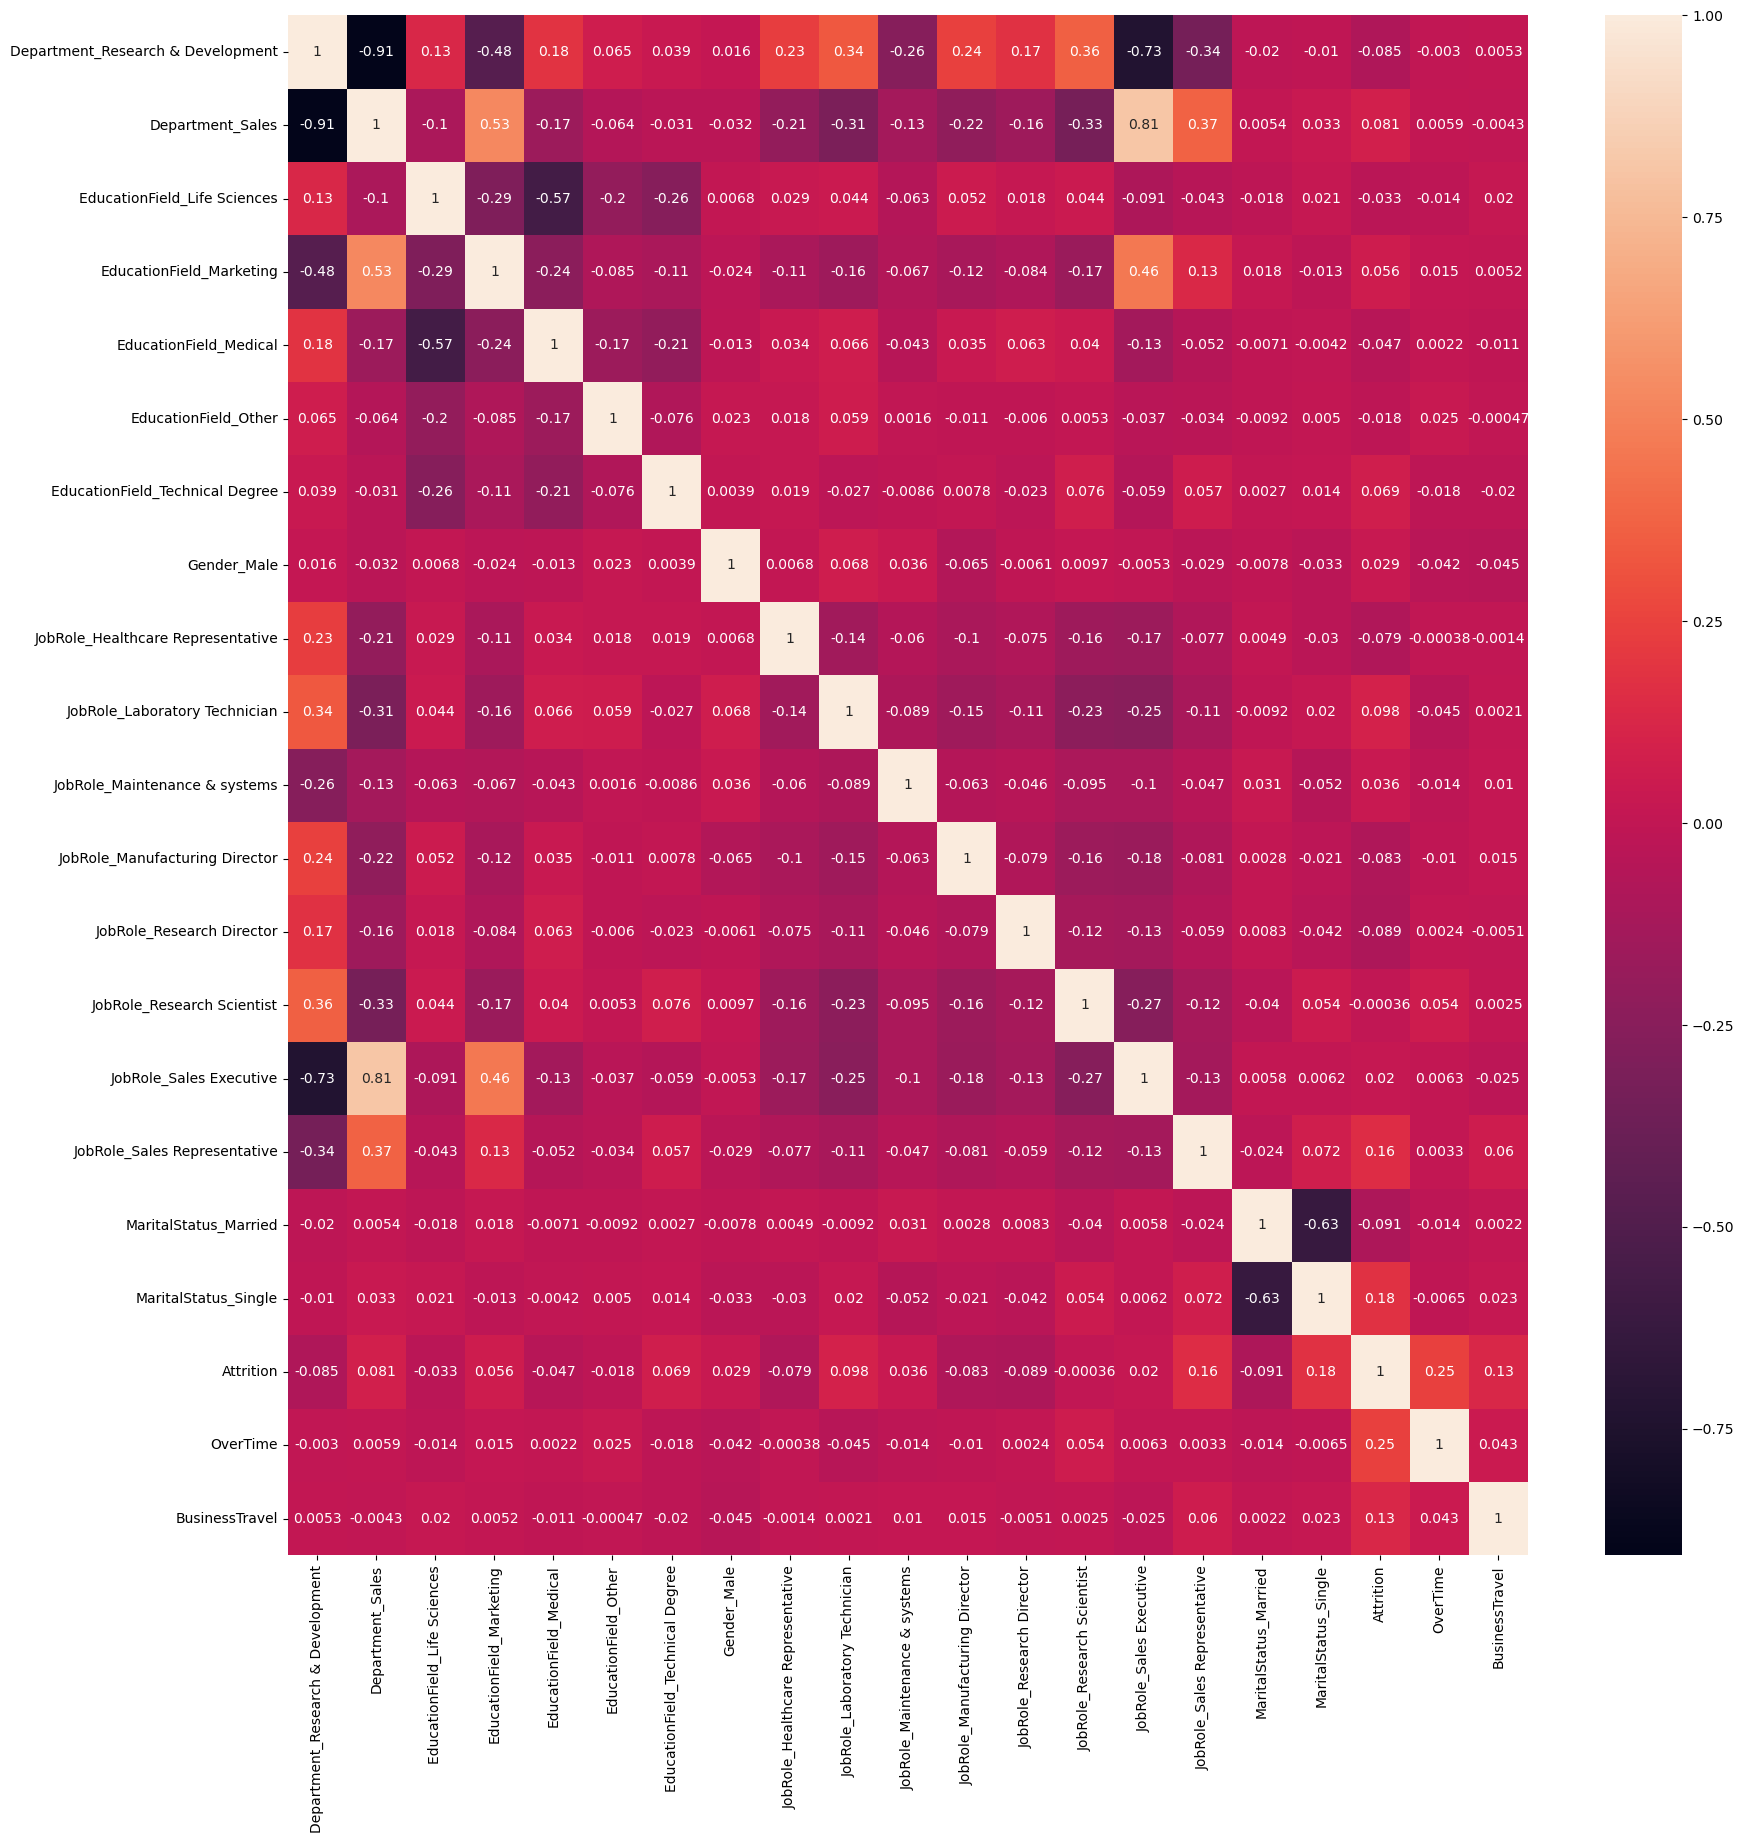

In [32]:
correlations_matrix2 = total_categorical_encoded.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlations_matrix2, annot=True)
plt.show()

In [33]:
total = pd.concat([total_categorical_encoded, numerical_main], axis=1)
total

,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Laboratory Technician,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11,1,0,8,0,1,6,4,0,5
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,23,4,1,10,3,3,10,7,1,7
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,15,2,0,7,3,3,0,0,0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11,3,0,8,3,3,8,7,3,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,17,3,1,17,3,3,5,2,0,3
1466,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,15,1,1,9,5,3,7,7,1,7
1467,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,20,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,14,4,0,17,3,2,9,6,0,8


In [34]:
## CORRELATION MATRIX BETWEEN THE NUMERICALS AND ATTRITION ENCODED 

numerical_plus_attrition_encoded = pd.concat([numerical_main, total_categorical_encoded["Attrition"]], axis=1)
numerical_plus_attrition_encoded

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1102,1,2,1,2,94,3,2,4,...,1,0,8,0,1,6,4,0,5,1
1,49,279,8,1,2,3,61,2,2,2,...,4,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,4,4,92,2,1,3,...,2,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,5,4,56,3,1,3,...,3,0,8,3,3,8,7,3,0,0
4,27,591,2,1,7,1,40,3,1,2,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,3,1,17,3,3,5,2,0,3,0
1466,39,613,6,1,2062,4,42,2,3,1,...,1,1,9,5,3,7,7,1,7,0
1467,27,155,4,3,2064,2,87,4,2,2,...,2,1,6,0,3,6,2,0,3,0
1468,49,1023,2,3,2065,4,63,2,2,2,...,4,0,17,3,2,9,6,0,8,0


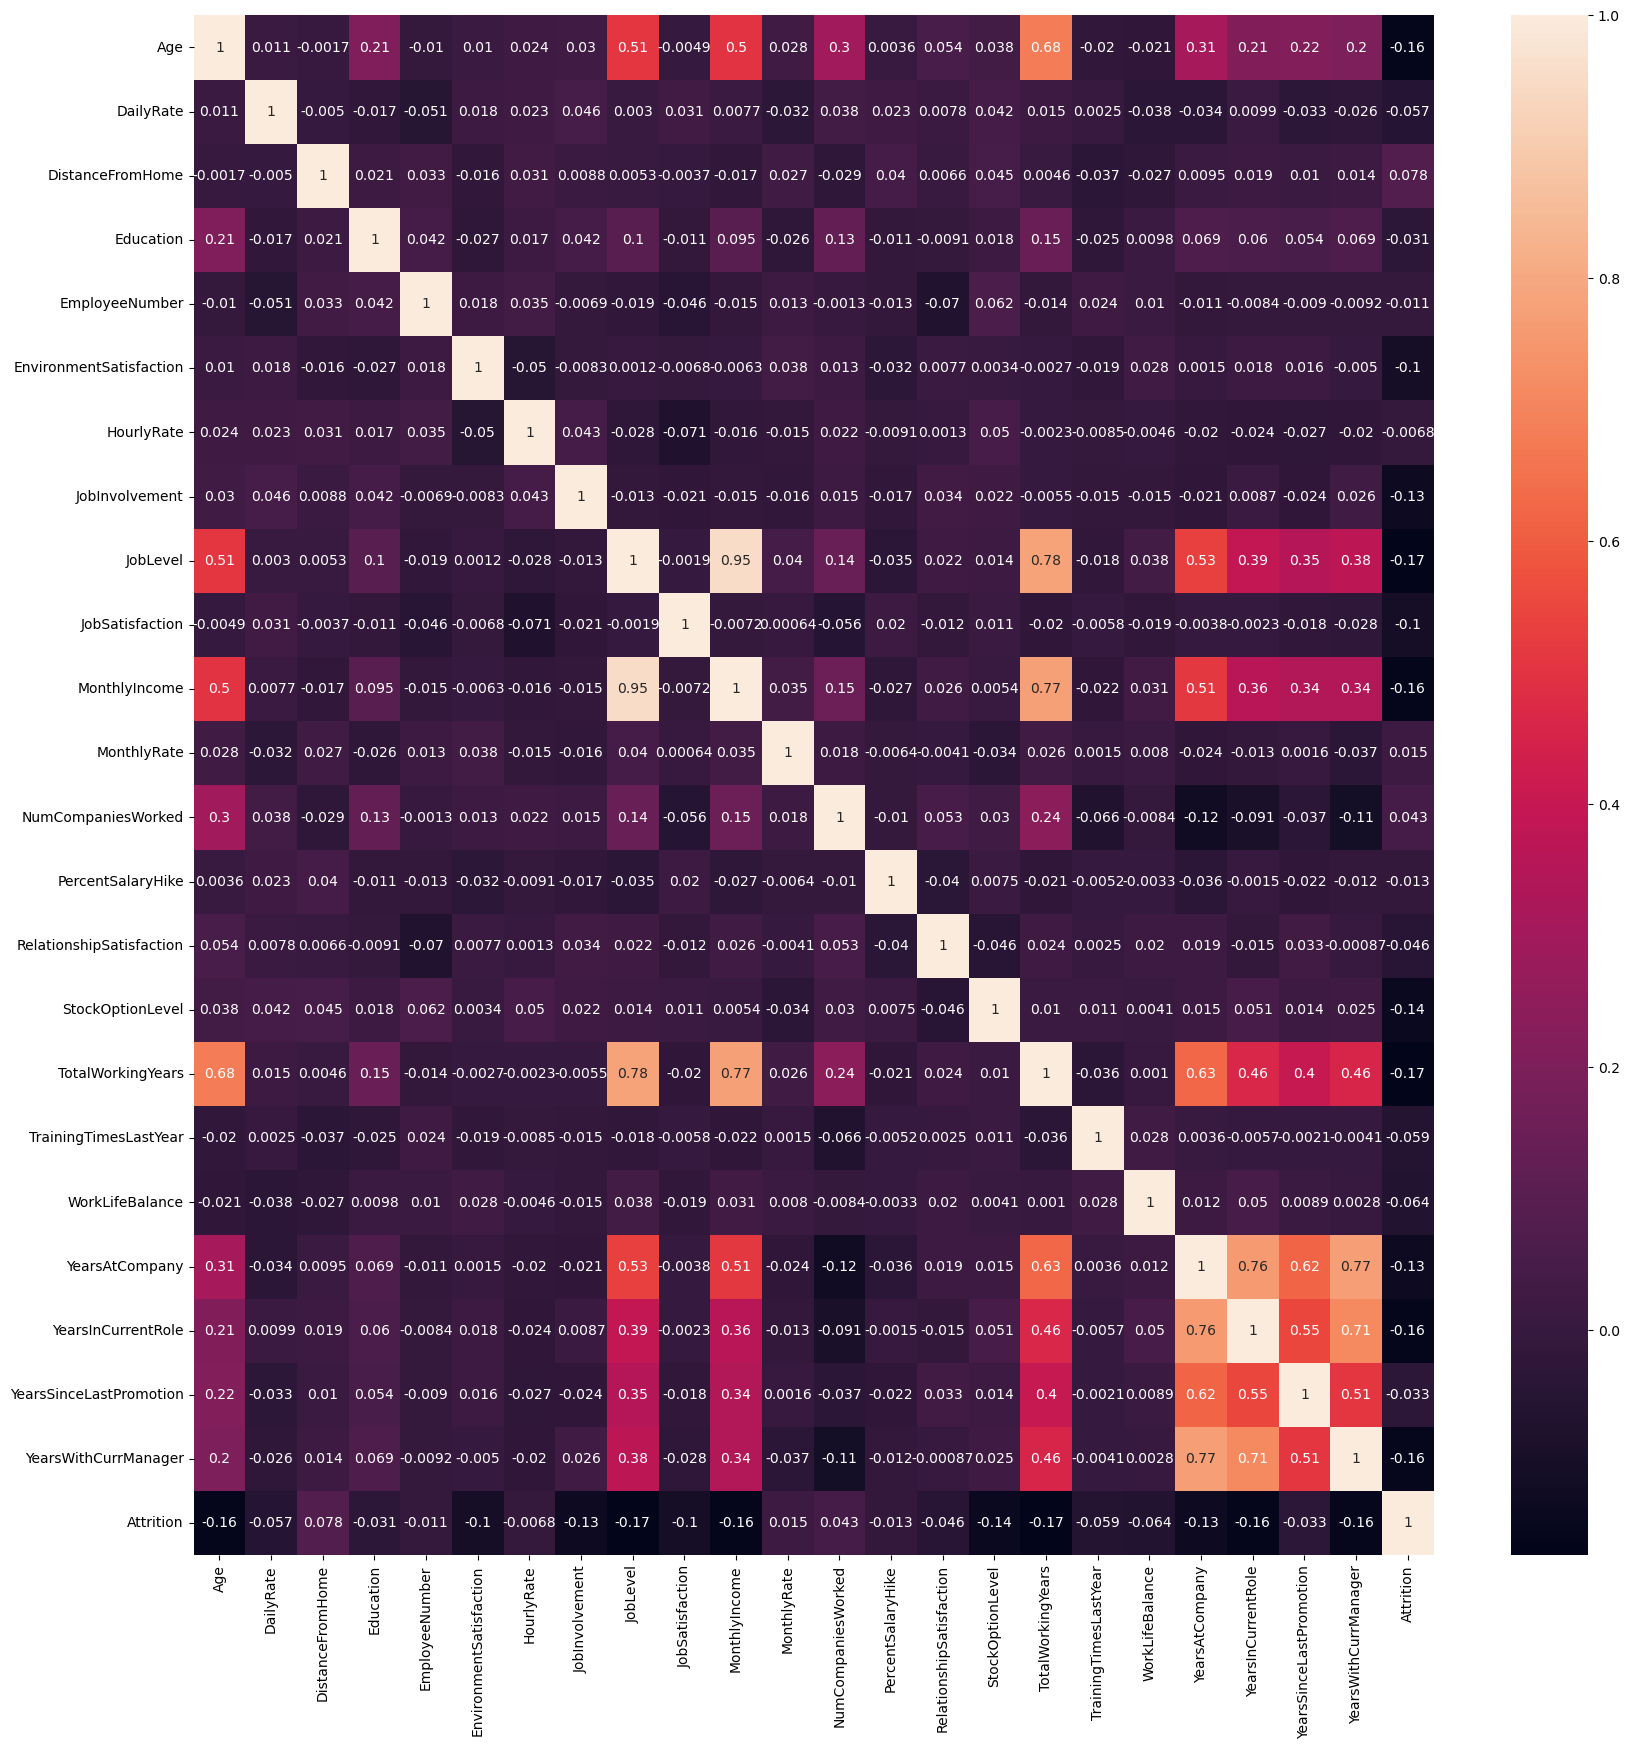

In [35]:
correlations_matrix3 = numerical_plus_attrition_encoded.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlations_matrix3, annot=True)
plt.show()

## COMPARING TABLES

### Employees X Department

In [36]:
#How many employees  in each department has a value  = < 2 in the column "WorkLifeBalance"?
result = main[main['WorkLifeBalance'] < 2]['Department'].value_counts()
print(result)

Research & Development    60
Sales                     16
IT                         4
Name: Department, dtype: int64


### Attrition x OverTime x Total Employees

In [37]:
total_employees = len(main)
yes_employees = len(main[(main['OverTime'] == 'Yes') & (main['Attrition'] == 'Yes')])
percentage = (yes_employees / total_employees) * 100

In [38]:
percentage

8.639455782312925

In [39]:
import pandas as pd

total_employees = len(main)
yes_employees = len(main[(main['OverTime'] == 'Yes') & (main['Attrition'] == 'Yes')])
percentage = (yes_employees / total_employees) * 100

data = {
    'Total Employees': [total_employees],
    'Yes Employees': [yes_employees],
    'Percentage': [percentage]
}

table = pd.DataFrame(data)
print(table)

   Total Employees  Yes Employees  Percentage
0             1470            127    8.639456


In [40]:
total_employees = len(main)
yes_employees = len(main[(main['WorkLifeBalance'] <= 2) & (main['Attrition'] == 'Yes')])
percentage = (yes_employees / total_employees) * 100

data = {
    'Total Employees': [total_employees],
    'Yes Employees': [yes_employees],
    'Percentage': [percentage]
}

table5 = pd.DataFrame(data)
print(table5)

   Total Employees  Yes Employees  Percentage
0             1470             83    5.646259


In [41]:
# Count the number of employees with 'Yes' in Attrition for each JobRole
attrition_counts = main[main['Attrition'] == 'Yes'].groupby('JobRole')['Attrition'].count()

# Calculate the percentage of employees with 'Yes' in Attrition for each JobRole
total_employees = len(main)
attrition_percentage = (attrition_counts / total_employees) * 100

# Create a DataFrame to store the counts and percentages
attrition_data = pd.DataFrame({'Attrition_Count': attrition_counts, 'Attrition_Percentage': attrition_percentage})

# Print the DataFrame
print(attrition_data)


                           Attrition_Count  Attrition_Percentage
JobRole                                                         
Data                                     5              0.340136
Healthcare Representative                9              0.612245
Laboratory Technician                   62              4.217687
Maintenance & systems                   12              0.816327
Manufacturing Director                  10              0.680272
Research Director                        2              0.136054
Research Scientist                      47              3.197279
Sales Executive                         57              3.877551
Sales Representative                    33              2.244898


### CONTINGENCY TABLES

In [42]:
matrix_donors = main

In [43]:
Attrition_OverTime_crosstab = pd.crosstab(matrix_donors['Attrition'], matrix_donors['OverTime'], margins=False) 
# margins=False means not display the sum of rows and column as "all".
Attrition_OverTime_crosstab

OverTime,No,Yes
Attrition,,
No,944,289
Yes,110,127


In [44]:
st.chi2_contingency(Attrition_OverTime_crosstab)

Chi2ContingencyResult(statistic=87.56429365828768, pvalue=8.15842372153832e-21, dof=1, expected_freq=array([[884.06938776, 348.93061224],
       [169.93061224,  67.06938776]]))

In [45]:
Attrition_JobRole_crosstab = pd.crosstab(matrix_donors['Attrition'], matrix_donors['JobRole'], margins=False)
Attrition_JobRole_crosstab

JobRole,Data,Healthcare Representative,Laboratory Technician,Maintenance & systems,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,97,122,197,40,135,78,245,269,50
Yes,5,9,62,12,10,2,47,57,33


In [46]:
st.chi2_contingency(Attrition_JobRole_crosstab)

Chi2ContingencyResult(statistic=86.19025367670434, pvalue=2.752481638050657e-15, dof=8, expected_freq=array([[ 85.55510204, 109.87959184, 217.24285714,  43.61632653,
        121.62244898,  67.10204082, 244.92244898, 273.44081633,
         69.61836735],
       [ 16.44489796,  21.12040816,  41.75714286,   8.38367347,
         23.37755102,  12.89795918,  47.07755102,  52.55918367,
         13.38163265]]))

In [47]:
Attrition_MaritalStatus_crosstab = pd.crosstab(matrix_donors['Attrition'], matrix_donors['MaritalStatus'], margins=False)
Attrition_MaritalStatus_crosstab

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


In [48]:
st.chi2_contingency(Attrition_MaritalStatus_crosstab)

Chi2ContingencyResult(statistic=46.163676540848705, pvalue=9.45551106034083e-11, dof=2, expected_freq=array([[274.27959184, 564.49591837, 394.2244898 ],
       [ 52.72040816, 108.50408163,  75.7755102 ]]))

In [49]:
Attrition_BT_crosstab = pd.crosstab(matrix_donors['Attrition'], matrix_donors['BusinessTravel'], margins=False)
Attrition_BT_crosstab

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,138,208,887
Yes,12,69,156


In [50]:
st.chi2_contingency(Attrition_BT_crosstab)

Chi2ContingencyResult(statistic=24.182413685655174, pvalue=5.608614476449931e-06, dof=2, expected_freq=array([[125.81632653, 232.34081633, 874.84285714],
       [ 24.18367347,  44.65918367, 168.15714286]]))

In [51]:
Attrition_Department_crosstab = pd.crosstab (matrix_donors['Attrition'], matrix_donors['Department'], margins=False)
Attrition_Department_crosstab
#That should be represented by pertange of total. 

Department,IT,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [52]:
st.chi2_contingency(Attrition_Department_crosstab)

Chi2ContingencyResult(statistic=10.79600732241067, pvalue=0.004525606574479633, dof=2, expected_freq=array([[ 52.84285714, 806.06326531, 374.09387755],
       [ 10.15714286, 154.93673469,  71.90612245]]))

In [53]:
Attrition_Education_crosstab = pd.crosstab(matrix_donors['Attrition'], matrix_donors['Education'], margins=False)
Attrition_Education_crosstab 

Education,1,2,3,4,5
Attrition,,,,,
No,139,238,473,340,43
Yes,31,44,99,58,5


In [54]:
st.chi2_contingency(Attrition_Education_crosstab )

Chi2ContingencyResult(statistic=3.0739613982367193, pvalue=0.5455253376565949, dof=4, expected_freq=array([[142.59183673, 236.53469388, 479.77959184, 333.83265306,
         40.26122449],
       [ 27.40816327,  45.46530612,  92.22040816,  64.16734694,
          7.73877551]]))

In [55]:
Attrition_EducationField_crosstab = pd.crosstab(matrix_donors['Attrition'], matrix_donors['EducationField'], margins=False)
Attrition_EducationField_crosstab 

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,20,517,124,401,71,100
Yes,7,89,35,63,11,32


In [56]:
st.chi2_contingency(Attrition_EducationField_crosstab)

Chi2ContingencyResult(statistic=16.024674119585423, pvalue=0.006773980139025222, dof=5, expected_freq=array([[ 22.64693878, 508.29795918, 133.36530612, 389.19183673,
         68.77959184, 110.71836735],
       [  4.35306122,  97.70204082,  25.63469388,  74.80816327,
         13.22040816,  21.28163265]]))

In [57]:
Attrition_Gender_crosstab = pd.crosstab(matrix_donors['Attrition'], matrix_donors['Gender'], margins=False)
Attrition_Gender_crosstab 
# Here take account about the proportion. because maybe there are more men than women. Show that in the presentation anyway. 

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


In [58]:
st.chi2_contingency(Attrition_Gender_crosstab)

Chi2ContingencyResult(statistic=1.1169671241970975, pvalue=0.29057244902890855, dof=1, expected_freq=array([[493.2, 739.8],
       [ 94.8, 142.2]]))

## Regression logistic model

In [ ]:
# scale numericals
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler

# Normalizing data
transformer = MinMaxScaler().fit(X_train_num) # we will reuse this transformer for X_test later
X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
X_train_scaled.head()

### X/y split (feature/target)

In [ ]:
y = main["Attrition"] #This is our target.
X = main.drop(["Attrition"], axis=1) # I DO need to encode, it is a secret categorical because each number means to one category.

In [ ]:
# split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# split numericals and categoricals. # We are going to escale the numericals and encode the categoricals. 
# We training separetely numerical and categorical. 

X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [ ]:
from sklearn.linear_model import LogisticRegression #In the model "linear_model" is included the logistic regression. 
classification = LogisticRegression()
classification.fit(X_train_treated, y_train)

In [ ]:
# apply scaler to X_test_num
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_scaled.head(30)

In [ ]:
# combine scaled and onehot_encoded portions of X_test
X_test_treated = pd.concat([X_test_scaled, onehot_encoded_test], axis=1)

In [ ]:
predictions = classification.predict(X_test_treated)
predictions
classification.score(X_test_treated, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

In [ ]:
# classification.score == accuracy of prediction
(12743+313)/len(predictions)

In [ ]:
y_test.value_counts()

In [ ]:
12835/(12835+2038) # score for blindly guessing A always

In [ ]:
classification.predict_proba(X_test_treated)